In [1]:
import matplotlib.pyplot as plt
%matplotlib widget
import numpy as np
import pandas as pd
import ipywidgets as widgets

import csv, os

import scipy.stats as statistics

In [2]:
df = pd.read_csv('wilcoxon_04_14_22_raw.csv')

df

,feature,lobe,artery_or_vein,FD_type,SCALE,total__count,total__mean,total__std,total__min,total__25%,...,pah__50%,pah__75%,pah__max,test_notes,t-test_control_epah,wilcoxon_control_epah,t-test_control_pah,wilcoxon_control_pah,t-test_epah_pah,wilcoxon_epah_pah
0,FDs__Fractal_Dimension,whole,NaN,NaN,1.0,91,2.359990,0.050217,2.229327,2.330151,...,2.357424,2.388985,2.450582,NaN,0.210051,0.155923,0.068757,0.049919,0.906241,0.446211
1,FDs_20Size__Fractal_Dimension,whole,NaN,NaN,1.0,91,2.376622,0.043137,2.259476,2.347448,...,2.374377,2.404468,2.458825,NaN,0.535884,0.261294,0.087072,0.106966,0.534514,0.290691
2,FDs_20SizeBy1__Fractal_Dimension,whole,NaN,20SizeBy1,1.0,91,2.385967,0.044026,2.262885,2.356429,...,2.381006,2.413977,2.467179,NaN,0.423233,0.185365,0.056453,0.072287,0.557270,0.319842
3,FDs_ManySize__Fractal_Dimension,whole,NaN,NaN,1.0,91,2.345189,0.056062,2.186633,2.311836,...,2.334533,2.375187,2.431338,NaN,0.073040,0.079774,0.032197,0.023870,0.650119,0.405447
4,FDs_ManySizeBy1__Fractal_Dimension,whole,NaN,ManySizeBy1,1.0,91,2.312846,0.058737,2.153502,2.279541,...,2.312568,2.336541,2.412617,NaN,0.036613,0.026109,0.081300,0.028008,0.259763,0.161504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,FDs_FACTOR_1_3_SCALE_ManySizeBy1_ArtVein__Frac...,whole,vein,ManySizeBy1,1.3,91,2.217731,0.071113,2.016468,2.181905,...,2.199107,2.239116,2.326778,NaN,0.007806,0.008057,0.000345,0.000277,0.709477,0.487551
125,FDs_FACTOR_1_4_SCALE_ManySizeBy1_ArtVein__Frac...,whole,vein,ManySizeBy1,1.4,91,2.229198,0.070154,2.031437,2.192653,...,2.211848,2.250156,2.338099,NaN,0.008393,0.008057,0.000429,0.000369,0.693926,0.487551
126,FDs_FACTOR_1_5_SCALE_ManySizeBy1_ArtVein__Frac...,whole,vein,ManySizeBy1,1.5,91,2.239742,0.069445,2.047849,2.202710,...,2.222168,2.259726,2.348267,NaN,0.008575,0.008057,0.000570,0.000426,0.659361,0.454447
127,FDs_20SizeBy1_allOffsets_ArtVein__Fractal_Dime...,whole,vein,20SizeBy1,1.0,91,1.974600,0.049042,1.805165,1.949601,...,1.957510,1.993893,2.072178,NaN,0.217371,0.106777,0.000596,0.000625,0.156145,0.080097


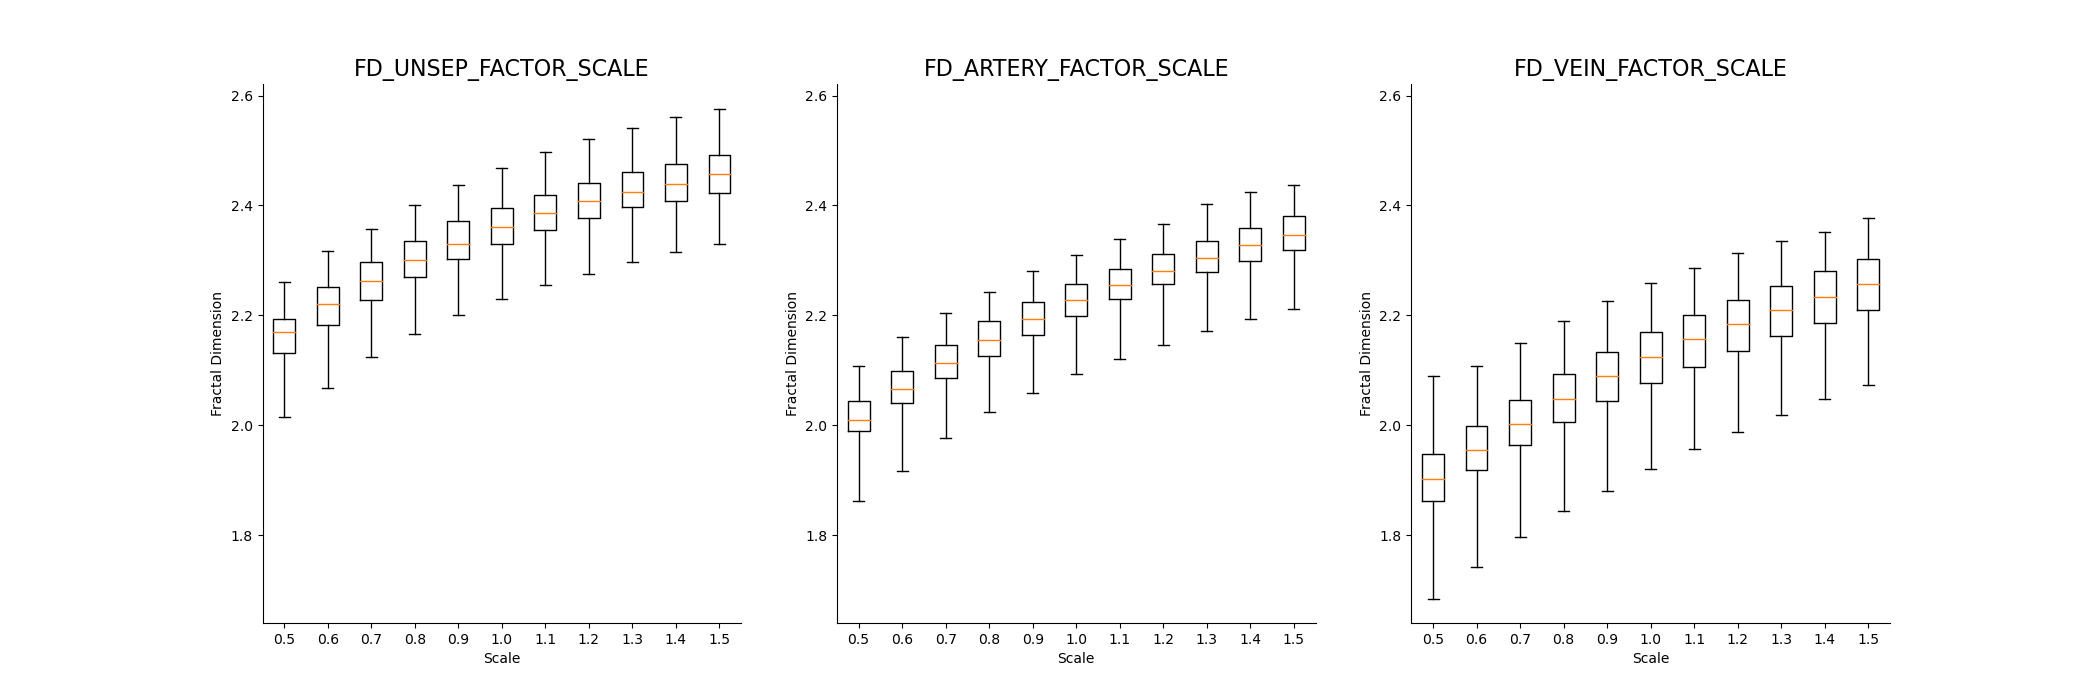

In [7]:
# Boxplots of Scales vs FD
scales = [0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5]

fig, axes = plt.subplots(1, 3, figsize=(21, 7), sharey=True)

stats = []
for scale in scales:
    row = df[df['artery_or_vein'].isna() & df['feature'].str.contains(str(scale).replace('.', '_')) & ~df['feature'].str.contains('20SizeBy1')].iloc[0]
    stats.append({
        'label': str(scale),
        'med': row['total__50%'],
        'q1': row['total__25%'],
        'q3': row['total__75%'],
        'whislo': row['total__min'],
        'whishi': row['total__max'],
        'fliers': [],
    })

things_to_plot = [
    {
        'label': 'FD_UNSEP_FACTOR_SCALE',
        'df': df[df['artery_or_vein'].isna() & df['feature'].str.contains('FACTOR') & ~df['feature'].str.contains('20SizeBy1')],
        'axes': 0,
        'color': 'blue',
    },
    {
        'label': 'FD_ARTERY_FACTOR_SCALE',
        'df': df[df['artery_or_vein'].str.contains('artery') & df['feature'].str.contains('FACTOR') & ~df['feature'].str.contains('20SizeBy1')],
        'axes': 1,
        'color': 'blue',
    },
    {
        'label': 'FD_VEIN_FACTOR_SCALE',
        'df': df[df['artery_or_vein'].str.contains('vein') & df['feature'].str.contains('FACTOR') & ~df['feature'].str.contains('20SizeBy1')],
        'axes': 2,
        'color': 'blue',
    }
]

for thing_to_plot in things_to_plot:
    stats = []
    for i, scale in enumerate(scales):
        row = thing_to_plot['df'].iloc[i]
        stats.append({
            'label': str(scale),
            'med': row['total__50%'],
            'q1': row['total__25%'],
            'q3': row['total__75%'],
            'whislo': row['total__min'],
            'whishi': row['total__max'],
            'fliers': [],
        })

    axes[thing_to_plot['axes']].bxp(stats)
    axes[thing_to_plot['axes']].set_title(f'{thing_to_plot["label"]}', fontsize=16)
    axes[thing_to_plot['axes']].set_xlabel('Scale')
    axes[thing_to_plot['axes']].set_ylabel('Fractal Dimension')

    axes[thing_to_plot['axes']].tick_params(axis='y', reset=True, right=False)
    axes[thing_to_plot['axes']].spines['top'].set_visible(False)
    axes[thing_to_plot['axes']].spines['right'].set_visible(False)
    # axes.spines['bottom'].set_visible(False)
    # axes.spines['left'].set_visible(False)

plt.show()

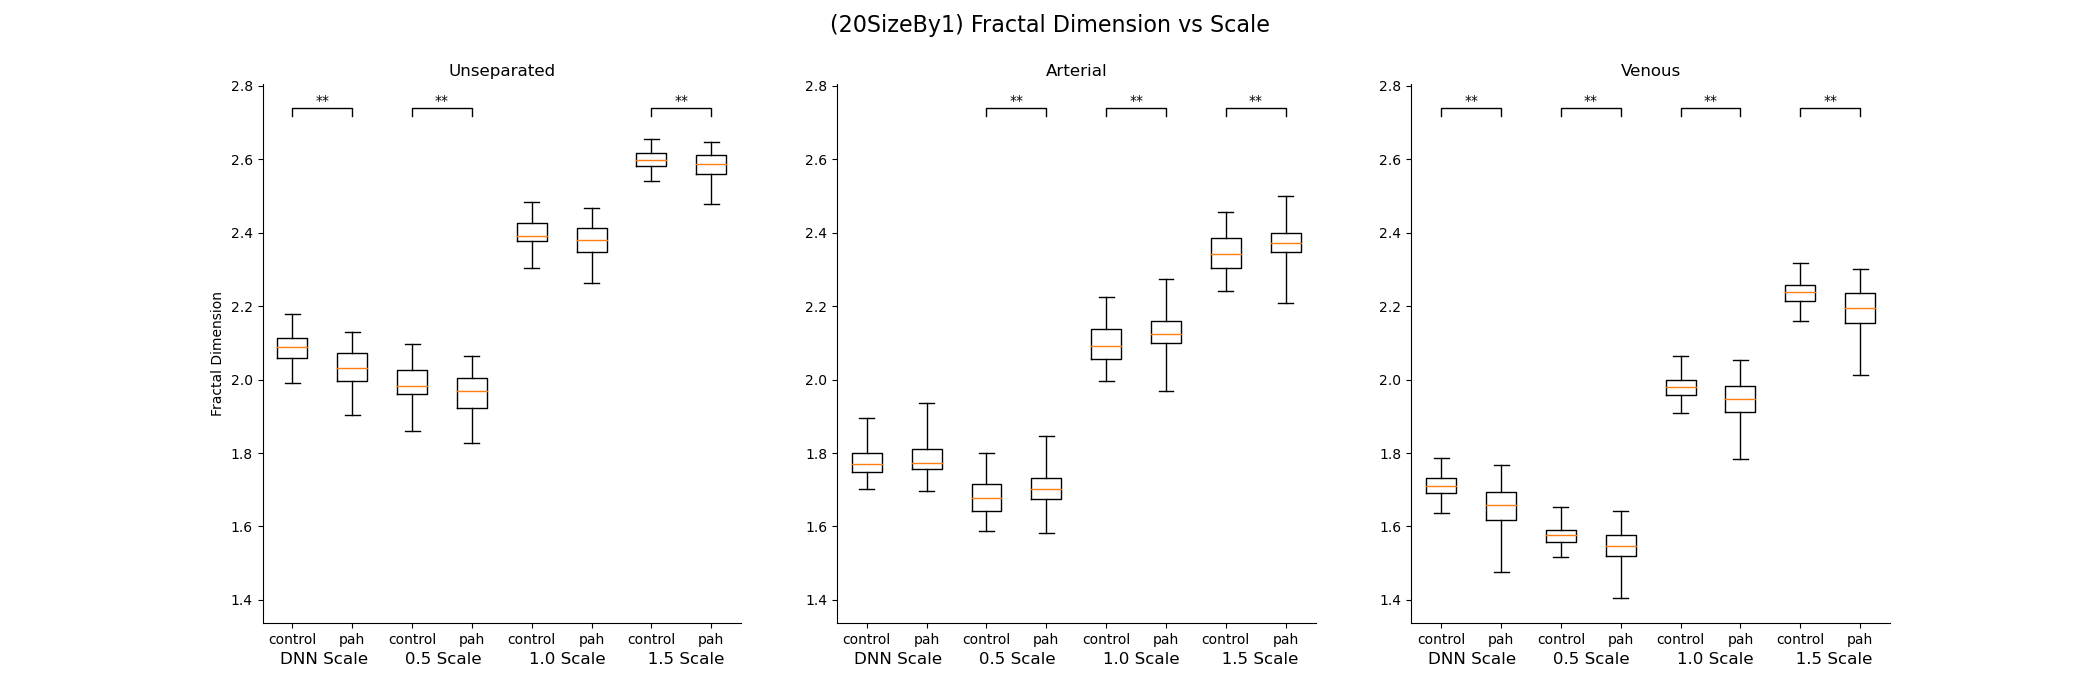

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(21, 7), sharey=True)

things_to_plot = [
    {
        'label': 'FDs_UNSEP_DNN_SCALE',
        'df': df[df['artery_or_vein'].isna() & df['feature'].str.contains('DNN') & df['FD_type'].str.contains('20SizeBy1')],
        'df_colname': 'control',
        'axes': 0,
        'title': None,
        'color': 'orange',
    },
    {
        'label': 'FDs_UNSEP_DNN_SCALE',
        'df': df[df['artery_or_vein'].isna() & df['feature'].str.contains('DNN') & df['FD_type'].str.contains('20SizeBy1')],
        'df_colname': 'pah',
        'axes': 0,
        'title': None,
        'color': 'orange',
    },
    {
        'label': 'FDs_ARTERY_DNN_SCALE',
        'df': df[df['artery_or_vein'].str.contains('artery') & df['feature'].str.contains('DNN') & df['FD_type'].str.contains('20SizeBy1')],
        'df_colname': 'control',
        'axes': 1,
        'title': None,
        'color': 'orange',
    },
    {
        'label': 'FDs_ARTERY_DNN_SCALE',
        'df': df[df['artery_or_vein'].str.contains('artery') & df['feature'].str.contains('DNN') & df['FD_type'].str.contains('20SizeBy1')],
        'df_colname': 'pah',
        'axes': 1,
        'title': None,
        'color': 'orange',
    },
    {
        'label': 'FDs_VEIN_DNN_SCALE',
        'df': df[df['artery_or_vein'].str.contains('vein') & df['feature'].str.contains('DNN') & df['FD_type'].str.contains('20SizeBy1')],
        'df_colname': 'control',
        'axes': 2,
        'title': None,
        'color': 'orange',
    },
    {
        'label': 'FDs_VEIN_DNN_SCALE',
        'df': df[df['artery_or_vein'].str.contains('vein') & df['feature'].str.contains('DNN') & df['FD_type'].str.contains('20SizeBy1')],
        'df_colname': 'pah',
        'axes': 2,
        'title': None,
        'color': 'orange',
    },
    {
        'label': 'FD_UNSEP_FACTOR_SCALE',
        'df': df[df['artery_or_vein'].isna() & df['feature'].str.contains('FACTOR_0_5') & df['FD_type'].str.contains('20SizeBy1')],
        'df_colname': 'control',
        'axes': 0,
        'title': 'Unseparated',
        'color': 'blue',
    },
    {
        'label': 'FD_UNSEP_FACTOR_SCALE',
        'df': df[df['artery_or_vein'].isna() & df['feature'].str.contains('FACTOR_0_5') & df['FD_type'].str.contains('20SizeBy1')],
        'df_colname': 'pah',
        'axes': 0,
        'title': None,
        'color': 'blue',
    },
    {
        'label': 'FD_ARTERY_FACTOR_SCALE',
        'df': df[df['artery_or_vein'].str.contains('artery') & df['feature'].str.contains('FACTOR_0_5') & df['FD_type'].str.contains('20SizeBy1')],
        'df_colname': 'control',
        'axes': 1,
        'title': 'Arterial',
        'color': 'blue',
    },
    {
        'label': 'FD_ARTERY_FACTOR_SCALE',
        'df': df[df['artery_or_vein'].str.contains('artery') & df['feature'].str.contains('FACTOR_0_5') & df['FD_type'].str.contains('20SizeBy1')],
        'df_colname': 'pah',
        'axes': 1,
        'title': None,
        'color': 'blue',
    },
    {
        'label': 'FD_VEIN_FACTOR_SCALE',
        'df': df[df['artery_or_vein'].str.contains('vein') & df['feature'].str.contains('FACTOR_0_5') & df['FD_type'].str.contains('20SizeBy1')],
        'df_colname': 'control',
        'axes': 2,
        'title': 'Venous',
        'color': 'blue',
    },
    {
        'label': 'FD_VEIN_FACTOR_SCALE',
        'df': df[df['artery_or_vein'].str.contains('vein') & df['feature'].str.contains('FACTOR_0_5') & df['FD_type'].str.contains('20SizeBy1')],
        'df_colname': 'pah',
        'axes': 2,
        'title': None,
        'color': 'orange',
    },
    {
        'label': 'FD_UNSEP_FACTOR_SCALE',
        'df': df[df['artery_or_vein'].isna() & df['feature'].str.contains('FACTOR_1_0') & df['FD_type'].str.contains('20SizeBy1')],
        'df_colname': 'control',
        'axes': 0,
        'title': 'Unseparated',
        'color': 'blue',
    },
    {
        'label': 'FD_UNSEP_FACTOR_SCALE',
        'df': df[df['artery_or_vein'].isna() & df['feature'].str.contains('FACTOR_1_0') & df['FD_type'].str.contains('20SizeBy1')],
        'df_colname': 'pah',
        'axes': 0,
        'title': None,
        'color': 'blue',
    },
    {
        'label': 'FD_ARTERY_FACTOR_SCALE',
        'df': df[df['artery_or_vein'].str.contains('artery') & df['feature'].str.contains('FACTOR_1_0') & df['FD_type'].str.contains('20SizeBy1')],
        'df_colname': 'control',
        'axes': 1,
        'title': 'Arterial',
        'color': 'blue',
    },
    {
        'label': 'FD_ARTERY_FACTOR_SCALE',
        'df': df[df['artery_or_vein'].str.contains('artery') & df['feature'].str.contains('FACTOR_1_0') & df['FD_type'].str.contains('20SizeBy1')],
        'df_colname': 'pah',
        'axes': 1,
        'title': None,
        'color': 'blue',
    },
    {
        'label': 'FD_VEIN_FACTOR_SCALE',
        'df': df[df['artery_or_vein'].str.contains('vein') & df['feature'].str.contains('FACTOR_1_0') & df['FD_type'].str.contains('20SizeBy1')],
        'df_colname': 'control',
        'axes': 2,
        'title': 'Venous',
        'color': 'blue',
    },
    {
        'label': 'FD_VEIN_FACTOR_SCALE',
        'df': df[df['artery_or_vein'].str.contains('vein') & df['feature'].str.contains('FACTOR_1_0') & df['FD_type'].str.contains('20SizeBy1')],
        'df_colname': 'pah',
        'axes': 2,
        'title': None,
        'color': 'orange',
    },
    {
        'label': 'FD_UNSEP_FACTOR_SCALE',
        'df': df[df['artery_or_vein'].isna() & df['feature'].str.contains('FACTOR_1_5') & df['FD_type'].str.contains('20SizeBy1')],
        'df_colname': 'control',
        'axes': 0,
        'title': 'Unseparated',
        'color': 'blue',
    },
    {
        'label': 'FD_UNSEP_FACTOR_SCALE',
        'df': df[df['artery_or_vein'].isna() & df['feature'].str.contains('FACTOR_1_5') & df['FD_type'].str.contains('20SizeBy1')],
        'df_colname': 'pah',
        'axes': 0,
        'title': None,
        'color': 'blue',
    },
    {
        'label': 'FD_ARTERY_FACTOR_SCALE',
        'df': df[df['artery_or_vein'].str.contains('artery') & df['feature'].str.contains('FACTOR_1_5') & df['FD_type'].str.contains('20SizeBy1')],
        'df_colname': 'control',
        'axes': 1,
        'title': 'Arterial',
        'color': 'blue',
    },
    {
        'label': 'FD_ARTERY_FACTOR_SCALE',
        'df': df[df['artery_or_vein'].str.contains('artery') & df['feature'].str.contains('FACTOR_1_5') & df['FD_type'].str.contains('20SizeBy1')],
        'df_colname': 'pah',
        'axes': 1,
        'title': None,
        'color': 'blue',
    },
    {
        'label': 'FD_VEIN_FACTOR_SCALE',
        'df': df[df['artery_or_vein'].str.contains('vein') & df['feature'].str.contains('FACTOR_1_5') & df['FD_type'].str.contains('20SizeBy1')],
        'df_colname': 'control',
        'axes': 2,
        'title': 'Venous',
        'color': 'blue',
    },
    {
        'label': 'FD_VEIN_FACTOR_SCALE',
        'df': df[df['artery_or_vein'].str.contains('vein') & df['feature'].str.contains('FACTOR_1_5') & df['FD_type'].str.contains('20SizeBy1')],
        'df_colname': 'pah',
        'axes': 2,
        'title': None,
        'color': 'orange',
    },
]

stats_list = [[], [], []]
for thing_to_plot in things_to_plot:
    df_to_plot = thing_to_plot['df']
    
    row = thing_to_plot['df'].iloc[0]
    stats_list[thing_to_plot['axes']].append({
        'label': thing_to_plot['df_colname'],
        'med': row[thing_to_plot['df_colname'] + '__50%'],
        'q1': row[thing_to_plot['df_colname'] + '__25%'],
        'q3': row[thing_to_plot['df_colname'] + '__75%'],
        'whislo': row[thing_to_plot['df_colname'] + '__min'],
        'whishi': row[thing_to_plot['df_colname'] + '__max'],
        'fliers': [],
        'color': {'medians': 'blue'},
    })
    
    if thing_to_plot['title']:
        axes[thing_to_plot['axes']].set_title(thing_to_plot['title'])
    

for i, stats in enumerate(stats_list):
    axes[i].bxp(stats)
    
    axes[i].set_xlabel('DNN Scale       0.5 Scale         1.0 Scale        1.5 Scale', fontsize=12)
    axes[0].set_ylabel('Fractal Dimension')

    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)
    
    axes[i].tick_params(axis='y', reset=True, right=False)

# Add Significance Markers
y = axes[0].get_ylim()[1]
h = .02

sig_lists = [
    ['**', '**', '', '**'], # Axes = 0
    ['', '**', '**', '**'], # Axes = 1
    ['**', '**', '**', '**'], # Axes = 2
]

for i, sig_list in enumerate(sig_lists):
    for j, sig in enumerate(sig_list):
        if len(sig) > 0:
            x1, x2 = j*2+1, j*2+2
            axes[i].plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c='black')
            axes[i].text((x1+x2)*.5, y+h, sig, ha='center', va='bottom', color='black')

fig.suptitle('(20SizeBy1) Fractal Dimension vs Scale', fontsize=16)
plt.show()

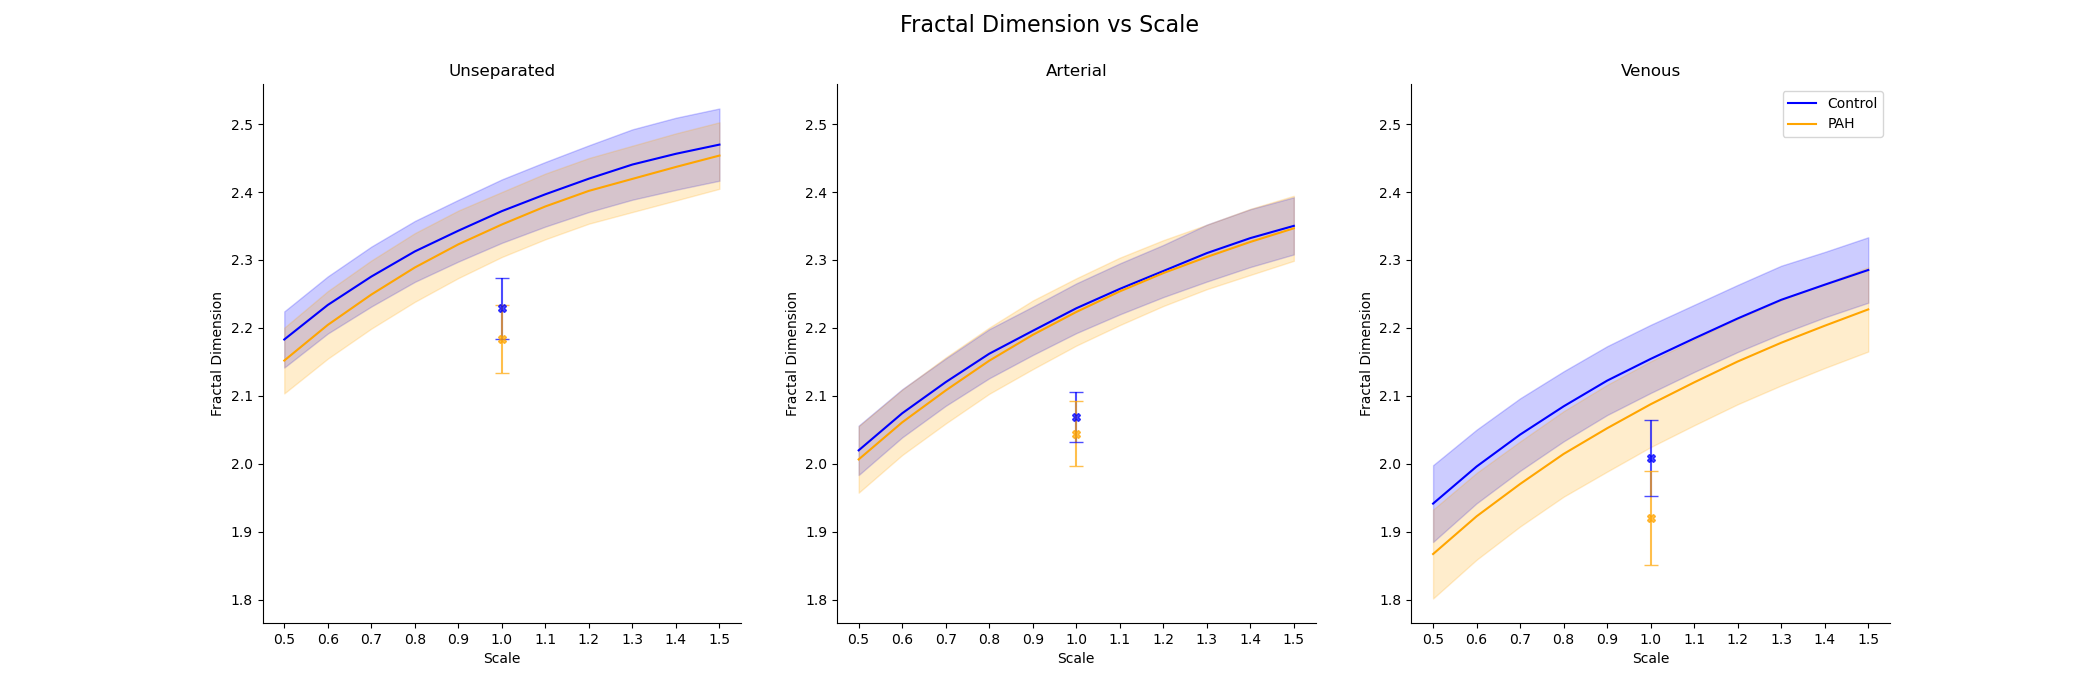

In [9]:
scales = [0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5]

fig, axes = plt.subplots(1, 3, figsize=(21, 7), sharey=True)

things_to_plot = [
    {
        'label': 'FD_UNSEP_FACTOR_SCALE',
        'df': df[df['artery_or_vein'].isna() & df['feature'].str.contains('FACTOR') & df['FD_type'].isna()],
        'df_colname': 'control',
        'axes': 0,
        'title': 'Unseparated',
        'color': 'blue',
    },
    {
        'label': 'FD_UNSEP_FACTOR_SCALE',
        'df': df[df['artery_or_vein'].isna() & df['feature'].str.contains('FACTOR') & df['FD_type'].isna()],
        'df_colname': 'pah',
        'axes': 0,
        'title': None,
        'color': 'orange',
    },
    {
        'label': 'FD_ARTERY_FACTOR_SCALE',
        'df': df[df['artery_or_vein'].str.contains('artery') & df['feature'].str.contains('FACTOR') & df['FD_type'].isna()],
        'df_colname': 'control',
        'axes': 1,
        'title': 'Arterial',
        'color': 'blue',
    },
    {
        'label': 'FD_ARTERY_FACTOR_SCALE',
        'df': df[df['artery_or_vein'].str.contains('artery') & df['feature'].str.contains('FACTOR') & df['FD_type'].isna()],
        'df_colname': 'pah',
        'axes': 1,
        'title': None,
        'color': 'orange',
    },
    {
        'label': 'FD_VEIN_FACTOR_SCALE',
        'df': df[df['artery_or_vein'].str.contains('vein') & df['feature'].str.contains('FACTOR') & df['FD_type'].isna()],
        'df_colname': 'control',
        'axes': 2,
        'title': 'Venous',
        'color': 'blue',
    },
    {
        'label': 'FD_VEIN_FACTOR_SCALE',
        'df': df[df['artery_or_vein'].str.contains('vein') & df['feature'].str.contains('FACTOR') & df['FD_type'].isna()],
        'df_colname': 'pah',
        'axes': 2,
        'title': None,
        'color': 'orange',
    },
    {
        'label': 'FDs_UNSEP_DNN_SCALE',
        'df': df[df['artery_or_vein'].isna() & df['feature'].str.contains('DNN') & df['FD_type'].isna()],
        'df_colname': 'control',
        'axes': 0,
        'title': None,
        'color': 'blue',
    },
    {
        'label': 'FDs_UNSEP_DNN_SCALE',
        'df': df[df['artery_or_vein'].isna() & df['feature'].str.contains('DNN') & df['FD_type'].isna()],
        'df_colname': 'pah',
        'axes': 0,
        'title': None,
        'color': 'orange',
    },
    {
        'label': 'FDs_ARTERY_DNN_SCALE',
        'df': df[df['artery_or_vein'].str.contains('artery') & df['feature'].str.contains('DNN') & df['FD_type'].isna()],
        'df_colname': 'control',
        'axes': 1,
        'title': None,
        'color': 'blue',
    },
    {
        'label': 'FDs_ARTERY_DNN_SCALE',
        'df': df[df['artery_or_vein'].str.contains('artery') & df['feature'].str.contains('DNN') & df['FD_type'].isna()],
        'df_colname': 'pah',
        'axes': 1,
        'title': None,
        'color': 'orange',
    },
    {
        'label': 'FDs_VEIN_DNN_SCALE',
        'df': df[df['artery_or_vein'].str.contains('vein') & df['feature'].str.contains('DNN') & df['FD_type'].isna()],
        'df_colname': 'control',
        'axes': 2,
        'title': None,
        'color': 'blue',
    },
    {
        'label': 'FDs_VEIN_DNN_SCALE',
        'df': df[df['artery_or_vein'].str.contains('vein') & df['feature'].str.contains('DNN') & df['FD_type'].isna()],
        'df_colname': 'pah',
        'axes': 2,
        'title': None,
        'color': 'orange',
    },
]

for thing_to_plot in things_to_plot:
    df_to_plot = thing_to_plot['df']
    
    data_X = df_to_plot[thing_to_plot['df_colname'] + '__mean']
    data_btwn1 = df_to_plot[thing_to_plot['df_colname'] + '__mean'] - df_to_plot[thing_to_plot['df_colname'] + '__std']
    data_btwn2 = df_to_plot[thing_to_plot['df_colname'] + '__mean'] + df_to_plot[thing_to_plot['df_colname'] + '__std']
    
    if len(data_X) > 1:
        axes[thing_to_plot['axes']].plot(scales, data_X,
                         color=thing_to_plot['color'])
        axes[thing_to_plot['axes']].fill_between(scales, data_btwn1, data_btwn2,
                         color=thing_to_plot['color'], alpha=0.2)
    else:
        # single data point
        axes[thing_to_plot['axes']].errorbar(1, data_X, df_to_plot[thing_to_plot['df_colname'] + '__std'],
                         color=thing_to_plot['color'], marker='X', alpha=0.7, capsize=5)
#         axes[thing_to_plot['axes']].fill_between(1, data_btwn1, data_btwn2,
#                          color=thing_to_plot['color'], alpha=0.2)

    axes[thing_to_plot['axes']].set_xlabel('Scale')
    axes[thing_to_plot['axes']].set_ylabel('Fractal Dimension')

    axes[thing_to_plot['axes']].spines['top'].set_visible(False)
    axes[thing_to_plot['axes']].spines['right'].set_visible(False)
    # axes.spines['bottom'].set_visible(False)
    # axes.spines['left'].set_visible(False)

    axes[thing_to_plot['axes']].tick_params(axis='y', reset=True, right=False)
    axes[thing_to_plot['axes']].set_xticks(scales)
    if thing_to_plot['title']:
        axes[thing_to_plot['axes']].set_title(thing_to_plot['title'])

fig.suptitle('Fractal Dimension vs Scale', fontsize=16)
plt.legend(['Control', 'PAH'])
plt.show()

ValueError: x and y must have same first dimension, but have shapes (11,) and (22,)

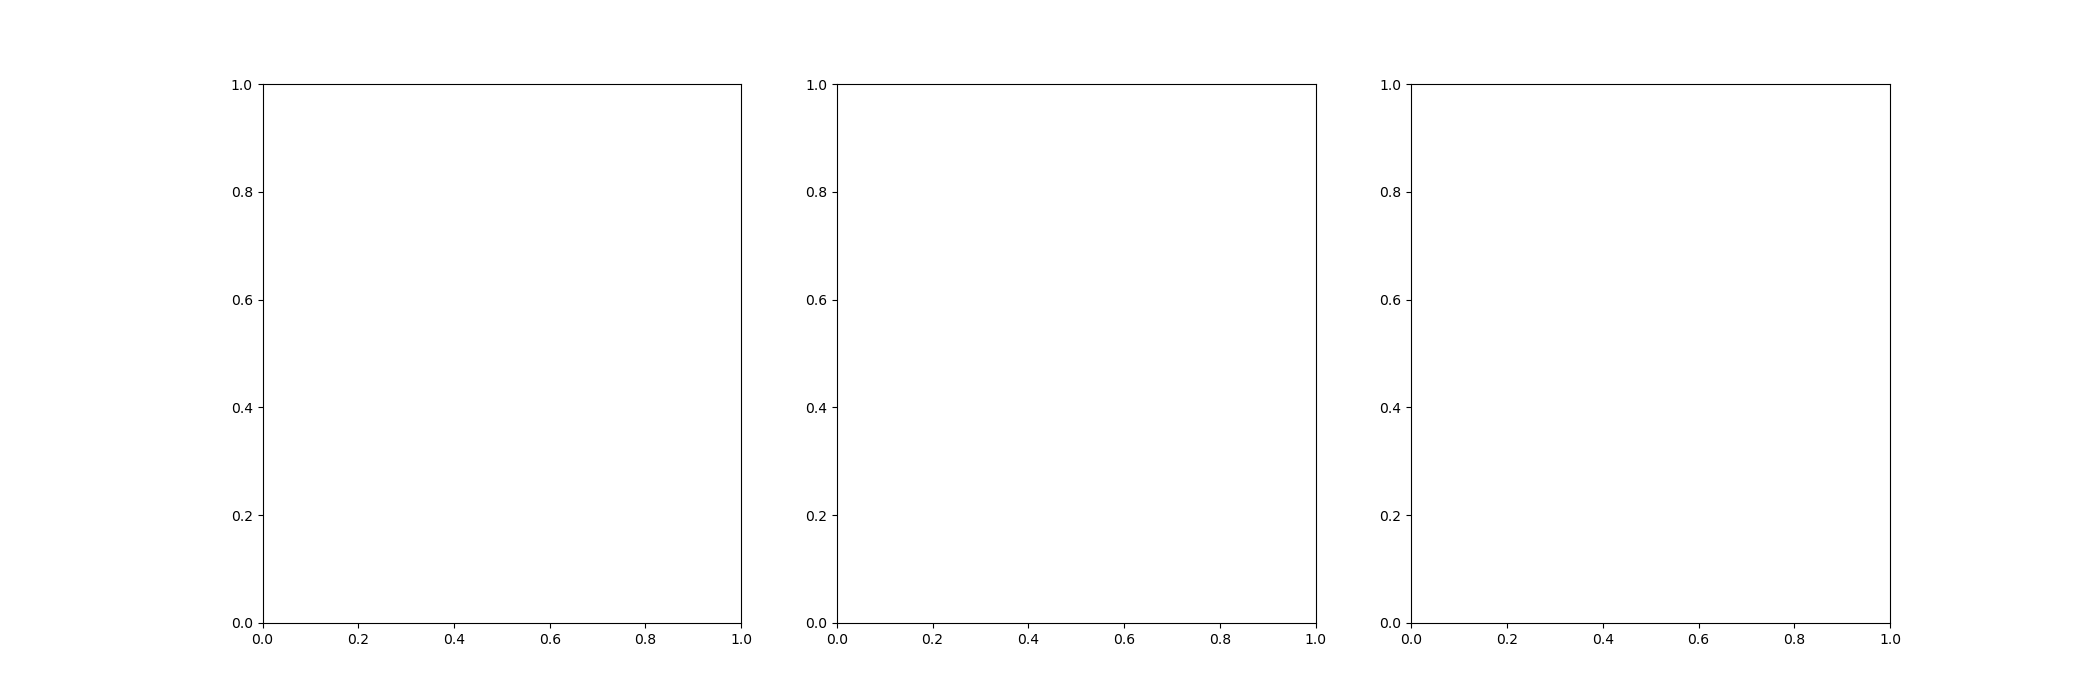

In [10]:
scales = [0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5]

fig, axes = plt.subplots(1, 3, figsize=(21, 7))

things_to_plot = [
    {
        'label': 'FD_UNSEP_FACTOR_SCALE',
        'df': df[df['artery_or_vein'].isna() & df['feature'].str.contains('FACTOR') & ~df['feature'].str.contains('20SizeBy1')],
        'axes': 0,
        'color': 'blue',
    },
    {
        'label': 'FD_UNSEP_FACTOR_SCALE_20SizeBy1',
        'df': df[df['artery_or_vein'].isna() & df['feature'].str.contains('FACTOR') & df['feature'].str.contains('20SizeBy1')],
        'axes': 0,
        'color': 'orange',
    },
    {
        'label': 'FD_ARTERY_FACTOR_SCALE',
        'df': df[df['artery_or_vein'].str.contains('artery') & df['feature'].str.contains('FACTOR') & ~df['feature'].str.contains('20SizeBy1')],
        'axes': 1,
        'color': 'blue',
    },
    {
        'label': 'FD_ARTERY_FACTOR_SCALE_20SizeBy1',
        'df': df[df['artery_or_vein'].str.contains('artery') & df['feature'].str.contains('FACTOR') & df['feature'].str.contains('20SizeBy1')],
        'axes': 1,
        'color': 'orange',
    },
    {
        'label': 'FD_VEIN_FACTOR_SCALE',
        'df': df[df['artery_or_vein'].str.contains('vein') & df['feature'].str.contains('FACTOR') & ~df['feature'].str.contains('20SizeBy1')],
        'axes': 2,
        'color': 'blue',
    },
    {
        'label': 'FD_VEIN_FACTOR_SCALE_20SizeBy1',
        'df': df[df['artery_or_vein'].str.contains('vein') & df['feature'].str.contains('FACTOR') & df['feature'].str.contains('20SizeBy1')],
        'axes': 2,
        'color': 'orange',
    },
]

titles = ['Unseparated', 'Arterial', 'Venous']

for i, thing_to_plot in enumerate(things_to_plot):
    df_to_plot = thing_to_plot['df']

    # wilcoxon_control_pah
    # t-test_control_pah
    axes[thing_to_plot['axes']].plot(scales, df_to_plot['t-test_control_pah'],
             color=thing_to_plot['color'])
#     axes[thing_to_plot['axes']].fill_between(scales, df_to_plot['total__mean'] - df_to_plot['total__std'],
#                               df_to_plot['total__mean'] + df_to_plot['total__std'],
#                      color=thing_to_plot['color'], alpha=0.2)
    
    axes[thing_to_plot['axes']].axhline(0.05, color='red', linestyle='--')
    
    axes[thing_to_plot['axes']].set_title('Scale vs Fractal Dimension')
    axes[thing_to_plot['axes']].set_xlabel('Scale')
    axes[thing_to_plot['axes']].set_ylabel('p-value')

    axes[thing_to_plot['axes']].spines['top'].set_visible(False)
    axes[thing_to_plot['axes']].spines['right'].set_visible(False)
    # axes.spines['bottom'].set_visible(False)
    # axes.spines['left'].set_visible(False)

    axes[thing_to_plot['axes']].tick_params(axis='y', reset=True, right=False)
    axes[thing_to_plot['axes']].set_xticks(scales)
    axes[thing_to_plot['axes']].set_title(titles[int(i/2)])

fig.suptitle('t-test: Fractal Dimension in Distinguishing Control and PAH', fontsize=16)
plt.legend(['FDs', '', 'FDs_20SizeBy1'])
plt.show()

In [ ]:
# The above figures demonstrate the effect of a scaling factor on the fractal dimensions of pulmonary vasculatures. Namely, fractal dimension was found to be directly proportional
# to the scaling factor when considering both small and large details. However, when calculating the fractal dimension using only smaller details via limiting
# box sizes (under 20 pixels), the trend of proportionality was found to be altered for combined vasculature and reversed for separated arterial and veinous fractal dimensions.
# These differences in trends highlight the importance of considering the scales being used in the calculation of fractal dimension.

## Interactive Plots

In [13]:
# USER CHANGEABLE PARAMETERS
ManySizeBy1_toggle = False

# Loads labelled data
filename_info = 'THE_WHEEL_12_31_2019_CHESTFINALSUBJECTS.xls'

pt_info = pd.read_excel(filename_info)
pt_info['label'] = pt_info['Group_Arb2'].map({0: 'control',
                                              1: 'pah',
                                              5: 'epah'})
pt_info['SID'] = pt_info['SID'].astype(str).str.zfill(3)

label_dict = dict(zip(pt_info['SID'].to_list(), pt_info['label'].to_list()))

# Expects all relevant files to be in these folders
folders = [
    os.path.join('FDs_data', 'FDs_DNN_SCALE'),
    os.path.join('FDs_data', 'FDs_FACTOR_SCALE', 'FDs_FACTOR_0_5_SCALE'),
    os.path.join('FDs_data', 'FDs_FACTOR_SCALE', 'FDs_FACTOR_1_0_SCALE'),
    os.path.join('FDs_data', 'FDs_FACTOR_SCALE', 'FDs_FACTOR_1_5_SCALE'),
    
    os.path.join('FDs_data', 'FDs_DNN_SCALE_Artvein'),
    os.path.join('FDs_data', 'FDs_FACTOR_SCALE_ArtVein', 'FDs_FACTOR_0_5_SCALE_ArtVein'),
    os.path.join('FDs_data', 'FDs_FACTOR_SCALE_ArtVein', 'FDs_FACTOR_1_0_SCALE_ArtVein'),
    os.path.join('FDs_data', 'FDs_FACTOR_SCALE_ArtVein', 'FDs_FACTOR_1_5_SCALE_ArtVein'),
]

if ManySizeBy1_toggle:
    folders = [
        os.path.join('FDs_data', 'FDs_DNN_SCALE_ManySizeBy1'),
        os.path.join('FDs_data', 'FDs_FACTOR_SCALE_ManySizeBy1', 'FDs_FACTOR_0_5_SCALE_ManySizeBy1'),
        os.path.join('FDs_data', 'FDs_FACTOR_SCALE_ManySizeBy1', 'FDs_FACTOR_1_0_SCALE_ManySizeBy1'),
        os.path.join('FDs_data', 'FDs_FACTOR_SCALE_ManySizeBy1', 'FDs_FACTOR_1_5_SCALE_ManySizeBy1'),

        os.path.join('FDs_data', 'FDs_DNN_SCALE_ManySizeBy1_Artvein'),
        os.path.join('FDs_data', 'FDs_FACTOR_SCALE_ManySizeBy1_ArtVein', 'FDs_FACTOR_0_5_SCALE_ManySizeBy1_ArtVein'),
        os.path.join('FDs_data', 'FDs_FACTOR_SCALE_ManySizeBy1_ArtVein', 'FDs_FACTOR_1_0_SCALE_ManySizeBy1_ArtVein'),
        os.path.join('FDs_data', 'FDs_FACTOR_SCALE_ManySizeBy1_ArtVein', 'FDs_FACTOR_1_5_SCALE_ManySizeBy1_ArtVein'),
    ]

df_list = []
for folder in folders:
    files = [f for f in os.listdir(folder) if 'Lung' in f]

    for f in files:
        # Only use files from patients in label_dict (those approved for usage)
        if f.split('_')[0] not in label_dict.keys():
            continue
        
        df_dict = {}
        with open(os.path.join(folder, f), 'r') as csv_file:
            csv_reader = csv.reader(csv_file)
            csv_data = list(csv_reader)

        sc_arr = np.asarray(csv_data[4:]).astype(int)
        sizes, counts = sc_arr[:, 0], sc_arr[:, 1]

        df_dict = {
            'Folder':              folder,
            'SID':                 '_'.join(f.split('_')[:-2]),
            'Lobe':                '',
            'Artery_Or_Vein':      '',
            'Label':               label_dict[f.split('_')[0]],
            'Fractal_Dimension':   float(csv_data[0][1]),
            'Coefficients':        np.array([csv_data[1][1], csv_data[2][1]]).astype(float),
            'Sizes':               sizes,
            'Counts':              counts,
            'logSizes':            np.log(sizes),
            'logCounts':           np.log(counts),
        }

        f = f.lower()
        if 'left' in f:
            df_dict['Lobe'] = 'left'
        elif 'right' in f:
            df_dict['Lobe'] = 'right'
        elif 'whole' in f:
            df_dict['Lobe'] = 'whole'

        if 'artery' in f:
            df_dict['Artery_Or_Vein'] = 'artery'
        elif 'vein' in f:
            df_dict['Artery_Or_Vein'] = 'vein'
        else:
            df_dict['Artery_Or_Vein'] = np.nan
        
        df_dict['Scale'] = 1.0
        if 'FACTOR' in folder:
            # Isolate digits from folder name and use last two digits as scale
            digits = [int(s) for s in folder.split('_') if s.isdigit()]
            df_dict['Scale'] = digits[-2] + digits[-1] * 0.1

        df_list.append(df_dict)

df_counts = pd.DataFrame(df_list);
display(df_counts)

,Folder,SID,Lobe,Artery_Or_Vein,Label,Fractal_Dimension,Coefficients,Sizes,Counts,logSizes,logCounts,Scale
0,FDs_data\FDs_DNN_SCALE,013_pect_phfirst_070511_wholeLungVesselParticl...,whole,NaN,pah,2.096448,"[-2.0964484730671575, 13.603584203545086]","[256, 128, 64, 32, 16, 8, 4, 2]","[8, 26, 118, 545, 2893, 13458, 43720, 153802]","[5.545177444479562, 4.852030263919617, 4.15888...","[2.0794415416798357, 3.258096538021482, 4.7706...",1.0
1,FDs_data\FDs_DNN_SCALE,020_pect_phfirst_041911_wholeLungVesselParticl...,whole,NaN,pah,2.237432,"[-2.2374315752713865, 14.520508360105838]","[256, 128, 64, 32, 16, 8, 4, 2]","[8, 35, 167, 887, 5143, 26414, 89248, 316768]","[5.545177444479562, 4.852030263919617, 4.15888...","[2.0794415416798357, 3.5553480614894135, 5.117...",1.0
2,FDs_data\FDs_DNN_SCALE,021_pect_phfirst_040910_wholeLungVesselParticl...,whole,NaN,pah,2.168213,"[-2.168213268810726, 13.875853446984781]","[256, 128, 64, 32, 16, 8, 4, 2]","[6, 25, 127, 605, 3194, 15428, 51320, 176999]","[5.545177444479562, 4.852030263919617, 4.15888...","[1.791759469228055, 3.2188758248682006, 4.8441...",1.0
3,FDs_data\FDs_DNN_SCALE,026_pect_phfirst_050413_wholeLungVesselParticl...,whole,NaN,pah,2.222013,"[-2.222013295376039, 13.933205142205846]","[128, 64, 32, 16, 8, 4, 2]","[19, 106, 533, 2973, 14699, 49808, 182069]","[4.852030263919617, 4.1588830833596715, 3.4657...","[2.9444389791664403, 4.663439094112067, 6.2785...",1.0
4,FDs_data\FDs_DNN_SCALE,028_pect_phfirst_063011_wholeLungVesselParticl...,whole,NaN,pah,2.098290,"[-2.0982897510923992, 13.490877018688389]","[256, 128, 64, 32, 16, 8, 4, 2]","[6, 24, 115, 521, 2708, 12032, 37818, 127700]","[5.545177444479562, 4.852030263919617, 4.15888...","[1.791759469228055, 3.1780538303479458, 4.7449...",1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1086,FDs_data\FDs_FACTOR_SCALE_ArtVein\FDs_FACTOR_1...,381_pect_phfirst_020713_wholeLungVesselParticl...,whole,vein,pah,2.207088,"[-2.207087975429174, 13.695564593206077]","[128, 64, 32, 16, 8, 4, 2]","[19, 90, 415, 2170, 9725, 39104, 183887]","[4.852030263919617, 4.1588830833596715, 3.4657...","[2.9444389791664403, 4.499809670330265, 6.0282...",1.5
1087,FDs_data\FDs_FACTOR_SCALE_ArtVein\FDs_FACTOR_1...,383_pect_phfirst_102514_wholeLungVesselParticl...,whole,artery,pah,2.374965,"[-2.374965408232839, 15.315578353446032]","[256, 128, 64, 32, 16, 8, 4, 2]","[10, 42, 213, 1104, 6069, 31932, 166303, 935919]","[5.545177444479562, 4.852030263919617, 4.15888...","[2.302585092994046, 3.7376696182833684, 5.3612...",1.5
1088,FDs_data\FDs_FACTOR_SCALE_ArtVein\FDs_FACTOR_1...,383_pect_phfirst_102514_wholeLungVesselParticl...,whole,vein,pah,2.273311,"[-2.27331112760624, 14.76837532726793]","[256, 128, 64, 32, 16, 8, 4, 2]","[10, 38, 190, 963, 4927, 22520, 106895, 573146]","[5.545177444479562, 4.852030263919617, 4.15888...","[2.302585092994046, 3.6375861597263857, 5.2470...",1.5
1089,FDs_data\FDs_FACTOR_SCALE_ArtVein\FDs_FACTOR_1...,388_pect_phfirst_080516_wholeLungVesselParticl...,whole,artery,pah,2.305408,"[-2.3054081316950032, 13.544825913995437]","[128, 64, 32, 16, 8, 4, 2]","[12, 51, 237, 1180, 6166, 31337, 168168]","[4.852030263919617, 4.1588830833596715, 3.4657...","[2.4849066497880004, 3.9318256327243257, 5.468...",1.5


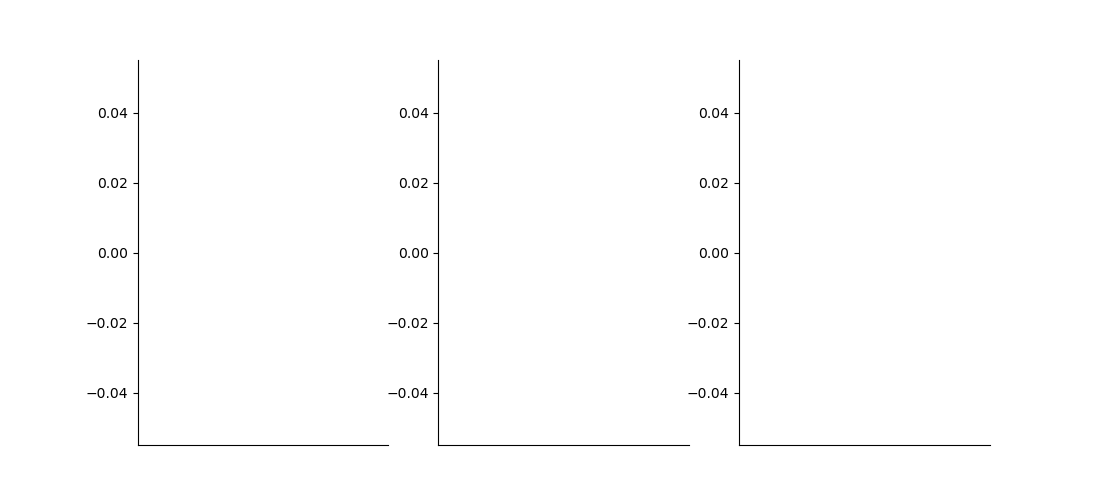

In [19]:
plt.close()
fig, axes = plt.subplots(1, 3, figsize=(11, 5), sharey=True)

# 24 categories for the 24 box-whisker plots
things_to_plot = [
    {
        'label': 'FDs_UNSEP_DNN_SCALE',
        'df': df_counts[df_counts['Artery_Or_Vein'].isna() & df_counts['Folder'].str.contains('DNN') & df_counts['Label'].str.contains('control')],
        'axes': 0,
    },
    {
        'label': 'FDs_UNSEP_DNN_SCALE',
        'df': df_counts[df_counts['Artery_Or_Vein'].isna() & df_counts['Folder'].str.contains('DNN') & df_counts['Label'].str.contains('pah')],
        'axes': 0,
    },
    {
        'label': 'FDs_ARTERY_DNN_SCALE',
        'df': df_counts[df_counts['Artery_Or_Vein'].str.contains('artery') & df_counts['Folder'].str.contains('DNN') & df_counts['Label'].str.contains('control')],
        'axes': 1,
    },
    {
        'label': 'FDs_ARTERY_DNN_SCALE',
        'df': df_counts[df_counts['Artery_Or_Vein'].str.contains('artery') & df_counts['Folder'].str.contains('DNN') & df_counts['Label'].str.contains('pah')],
        'axes': 1,
    },
    {
        'label': 'FDs_VEIN_DNN_SCALE',
        'df': df_counts[df_counts['Artery_Or_Vein'].str.contains('vein') & df_counts['Folder'].str.contains('DNN') & df_counts['Label'].str.contains('control')],
        'axes': 2,
    },
    {
        'label': 'FDs_VEIN_DNN_SCALE',
        'df': df_counts[df_counts['Artery_Or_Vein'].str.contains('vein') & df_counts['Folder'].str.contains('DNN') & df_counts['Label'].str.contains('pah')],
        'axes': 2,
    },
    {
        'label': 'FD_UNSEP_FACTOR_SCALE',
        'df': df_counts[df_counts['Artery_Or_Vein'].isna() & df_counts['Folder'].str.contains('FACTOR_0_5') & df_counts['Label'].str.contains('control')],
        'axes': 0,
    },
    {
        'label': 'FD_UNSEP_FACTOR_SCALE',
        'df': df_counts[df_counts['Artery_Or_Vein'].isna() & df_counts['Folder'].str.contains('FACTOR_0_5') & df_counts['Label'].str.contains('pah')],
        'axes': 0,
    },
    {
        'label': 'FD_ARTERY_FACTOR_SCALE',
        'df': df_counts[df_counts['Artery_Or_Vein'].str.contains('artery') & df_counts['Folder'].str.contains('FACTOR_0_5') & df_counts['Label'].str.contains('control')],
        'axes': 1,
    },
    {
        'label': 'FD_ARTERY_FACTOR_SCALE',
        'df': df_counts[df_counts['Artery_Or_Vein'].str.contains('artery') & df_counts['Folder'].str.contains('FACTOR_0_5') & df_counts['Label'].str.contains('pah')],
        'axes': 1,
    },
    {
        'label': 'FD_VEIN_FACTOR_SCALE',
        'df': df_counts[df_counts['Artery_Or_Vein'].str.contains('vein') & df_counts['Folder'].str.contains('FACTOR_0_5') & df_counts['Label'].str.contains('control')],
        'axes': 2,
    },
    {
        'label': 'FD_VEIN_FACTOR_SCALE',
        'df': df_counts[df_counts['Artery_Or_Vein'].str.contains('vein') & df_counts['Folder'].str.contains('FACTOR_0_5') & df_counts['Label'].str.contains('pah')],
        'axes': 2,
    },
    {
        'label': 'FD_UNSEP_FACTOR_SCALE',
        'df': df_counts[df_counts['Artery_Or_Vein'].isna() & df_counts['Folder'].str.contains('FACTOR_1_0') & df_counts['Label'].str.contains('control')],
        'axes': 0,
    },
    {
        'label': 'FD_UNSEP_FACTOR_SCALE',
        'df': df_counts[df_counts['Artery_Or_Vein'].isna() & df_counts['Folder'].str.contains('FACTOR_1_0') & df_counts['Label'].str.contains('pah')],
        'axes': 0,
    },
    {
        'label': 'FD_ARTERY_FACTOR_SCALE',
        'df': df_counts[df_counts['Artery_Or_Vein'].str.contains('artery') & df_counts['Folder'].str.contains('FACTOR_1_0') & df_counts['Label'].str.contains('control')],
        'axes': 1,
    },
    {
        'label': 'FD_ARTERY_FACTOR_SCALE',
        'df': df_counts[df_counts['Artery_Or_Vein'].str.contains('artery') & df_counts['Folder'].str.contains('FACTOR_1_0') & df_counts['Label'].str.contains('pah')],
        'axes': 1,
    },
    {
        'label': 'FD_VEIN_FACTOR_SCALE',
        'df': df_counts[df_counts['Artery_Or_Vein'].str.contains('vein') & df_counts['Folder'].str.contains('FACTOR_1_0') & df_counts['Label'].str.contains('control')],
        'axes': 2,
    },
    {
        'label': 'FD_VEIN_FACTOR_SCALE',
        'df': df_counts[df_counts['Artery_Or_Vein'].str.contains('vein') & df_counts['Folder'].str.contains('FACTOR_1_0') & df_counts['Label'].str.contains('pah')],
        'axes': 2,
    },
    {
        'label': 'FD_UNSEP_FACTOR_SCALE',
        'df': df_counts[df_counts['Artery_Or_Vein'].isna() & df_counts['Folder'].str.contains('FACTOR_1_5') & df_counts['Label'].str.contains('control')],
        'axes': 0,
    },
    {
        'label': 'FD_UNSEP_FACTOR_SCALE',
        'df': df_counts[df_counts['Artery_Or_Vein'].isna() & df_counts['Folder'].str.contains('FACTOR_1_5') & df_counts['Label'].str.contains('pah')],
        'axes': 0,
    },
    {
        'label': 'FD_ARTERY_FACTOR_SCALE',
        'df': df_counts[df_counts['Artery_Or_Vein'].str.contains('artery') & df_counts['Folder'].str.contains('FACTOR_1_5') & df_counts['Label'].str.contains('control')],
        'axes': 1,
    },
    {
        'label': 'FD_ARTERY_FACTOR_SCALE',
        'df': df_counts[df_counts['Artery_Or_Vein'].str.contains('artery') & df_counts['Folder'].str.contains('FACTOR_1_5') & df_counts['Label'].str.contains('pah')],
        'axes': 1,
    },
    {
        'label': 'FD_VEIN_FACTOR_SCALE',
        'df': df_counts[df_counts['Artery_Or_Vein'].str.contains('vein') & df_counts['Folder'].str.contains('FACTOR_1_5') & df_counts['Label'].str.contains('control')],
        'axes': 2,
    },
    {
        'label': 'FD_VEIN_FACTOR_SCALE',
        'df': df_counts[df_counts['Artery_Or_Vein'].str.contains('vein') & df_counts['Folder'].str.contains('FACTOR_1_5') & df_counts['Label'].str.contains('pah')],
        'axes': 2,
    },
]

# Create Widgets
options = [2, 4, 8, 16, 32, 64, 128, 256]
if ManySizeBy1_toggle:
    options = np.arange(2, 257)

slider = widgets.SelectionRangeSlider(
    options=options,
    index=(0, len(options)-1),
    description='Box Counts',
    disabled=False,
    continuous_update=False,
)

button = widgets.Button(
    description='Update',
    disabled=False,
    button_style='info',
    tooltip='Update graphs with new box counts',
)

w = widgets.HBox([
    slider,
    button,
])

# Generates stars for showing results of significance testing
# '**' --> Both tests significant
# '*'  --> Only one test significant
# ''   --> No tests significant
def star_for_significance(X1, X2):
    _, pvalue_twoSample = statistics.ttest_ind(X1, X2)
    _, pvalue_Wilcoxon = statistics.mannwhitneyu(X1, X2)
    
#     if pvalue_twoSample < 0.05 and pvalue_Wilcoxon < 0.05:
#         return '**'
#     elif pvalue_twoSample < 0.05 or pvalue_Wilcoxon < 0.05:
#         return '*'
#     else:
#         return ''
    
#     return pvalue_Wilcoxon
    if pvalue_Wilcoxon < 0.01:
        return '**'
    elif pvalue_Wilcoxon < 0.05:
        return '*'
    else:
        return ''

# Runs when button is clicked
# Grabs current slider values as limits for box sizes
# Generates FDs and plots as BW-plots with significance markers
def update(b):
    stats_list = [[], [], []]
    for thing_to_plot in things_to_plot:
        df_to_plot = thing_to_plot['df']
        
        lower_bound = slider.value[0]
        upper_bound = slider.value[1]

        if 'By1' in folder:
            m = 1
        else:
            m = 2

        if '20Size' in folder:
            mask = np.arange(20, 1, -m)
        elif 'ManySize' in folder:
            mask = np.arange(upper_bound, lower_bound-1, -m)
        else:
            lower_log = int(np.log(lower_bound) / np.log(2))
            upper_log = int(np.log(upper_bound) / np.log(2))
            mask = 2**np.arange(upper_log, lower_log-1, -1)

        FDs = []
        for _, row in df_to_plot.iterrows():
            mask_ind = len(row['Sizes']) - np.searchsorted(row['Sizes'][::-1], mask[::-1])[::-1] - 1

            sizes = row['Sizes'][mask_ind]
            counts = row['Counts'][mask_ind]
            
            # Handles cases where box sizes are lower than expected (<256)
            # Trims if actual box size is lower than upper_bound
            for i in range(0, len(sizes)-1):
                if sizes[i] < sizes[i+1]:
                    sizes = sizes[i+1:]
                    counts = counts[i+1:]
                    break
            
            sizes_log = np.log(sizes)
            counts_log = np.log(counts)

            poly = np.polynomial.polynomial.Polynomial.fit(x=sizes_log, y=counts_log, deg=1, domain=[])

            FDs.append(-poly.coef[1])

        stats_list[thing_to_plot['axes']].append(FDs)
    
    for i, stats in enumerate(stats_list):
        axes[i].cla()
        axes[i].boxplot(stats, whis=[0, 100], labels=['ctrl', 'pah', 'ctrl', 'pah', 'ctrl', 'pah', 'ctrl', 'pah'])
        
        axes[i].relim()
        axes[i].autoscale()
        
        axes[i].set_xlabel('DNN      0.5      1.0      1.5', fontsize=11, weight='bold')
        axes[i].set_title(titles[i])
    
    # Add Significance Markers
    sig_lists = [[], [], []]
    
    for i, stats in enumerate(stats_list):
        sig_lists[i].append(star_for_significance(stats[0], stats[1]))
        sig_lists[i].append(star_for_significance(stats[2], stats[3]))
        sig_lists[i].append(star_for_significance(stats[4], stats[5]))
        sig_lists[i].append(star_for_significance(stats[6], stats[7]))
    
    y = axes[0].get_ylim()[1]
    h = .02

    for i, sig_list in enumerate(sig_lists):
        for j, sig in enumerate(sig_list):
            if len(sig) > 0:
                x1, x2 = j*2+1, j*2+2
                axes[i].plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c='black')
                axes[i].text((x1+x2)*.5, y+h, sig, ha='center', va='bottom', color='black')
    
    axes[0].set_ylabel('Fractal Dimension', fontsize=11)
    fig.suptitle(f'FD for Box Sizes [{lower_bound}, {upper_bound}]')

stats_list = [[], [], []]
titles = ['Unseparated', 'Arterial', 'Venous']
for i, stats in enumerate(stats_list):
    axes[i].boxplot(stats, whis=[0, 100])
    axes[i].relim()
    axes[i].autoscale()
    
    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)

    axes[i].tick_params(axis='y', reset=True, right=False)

plt.show()

fig.canvas.toolbar_visible = False
fig.canvas.header_visible = False
fig.canvas.footer_visible = False

update(button)
button.on_click(update)

w

In [6]:
# INCREASING LOWER BOUNDS
# lower_bounds = [2, 4, 8, 16, 32, 64]
# upper_bounds = [256, 256, 256, 256, 256, 256]

# INCREASING UPPER BOUNDS
# lower_bounds = [2, 2, 2, 2, 2, 2]
# upper_bounds = [8, 16, 32, 64, 128, 256]

# INCREASING BOTH BOUNDS
lower_bounds = [2, 2, 2, 2, 2, 2, 4, 8, 16, 32, 64]
upper_bounds = [8, 16, 32, 64, 128, 256, 256, 256, 256, 256, 256]

# MOVING LOCAL FD (window of 3)
# lower_bounds = [2, 4, 8, 16, 32, 64]
# upper_bounds = [8, 16, 32, 64, 128, 256]

# MOVING LOCAL FD (window of 4)
# lower_bounds = [2, 4, 8, 16, 32]
# upper_bounds = [16, 32, 64, 128, 256]

df_list = []
for i in range(0, len(lower_bounds)):
    lower_bound = lower_bounds[i]
    upper_bound = upper_bounds[i]
    
    df_dict = {
        'lower_bound': lower_bound,
        'upper_bound': upper_bound,
    }
    
    stats_list = [[], [], []]
    for thing_to_plot in things_to_plot:
        df_to_plot = thing_to_plot['df']

        if 'By1' in folder:
            m = 1
        else:
            m = 2

        if '20Size' in folder:
            mask = np.arange(20, 1, -m)
        elif 'ManySize' in folder:
            mask = np.arange(upper_bound, lower_bound-1, -m)
        else:
            lower_log = int(np.log(lower_bound) / np.log(2))
            upper_log = int(np.log(upper_bound) / np.log(2))
            mask = 2**np.arange(upper_log, lower_log-1, -1)

        FDs = []
        for _, row in df_to_plot.iterrows():
            mask_ind = len(row['Sizes']) - np.searchsorted(row['Sizes'][::-1], mask[::-1])[::-1] - 1

            sizes = row['Sizes'][mask_ind]
            counts = row['Counts'][mask_ind]

            # Handles cases where box sizes are lower than expected (<256)
            # Trims if actual box size is lower than upper_bound
            for i in range(0, len(sizes)-1):
                if sizes[i] < sizes[i+1]:
                    sizes = sizes[i+1:]
                    counts = counts[i+1:]
                    break

            sizes_log = np.log(sizes)
            counts_log = np.log(counts)

            poly = np.polynomial.polynomial.Polynomial.fit(x=sizes_log, y=counts_log, deg=1, domain=[])

            FDs.append(-poly.coef[1])
            
        stats_list[thing_to_plot['axes']].append(FDs)
    
    labels = ['UNSEP', 'ARTERY', 'VEIN']
    for i, stats in enumerate(stats_list):
        # DNN
#         label = labels[i] + '_DNN_SCALE'
        label = labels[i]
        df_dict[f'{label}_ctrlMedian'] = np.median(stats[0])
        df_dict[f'{label}_pahMedian'] = np.median(stats[1])
        df_dict[f'{label}_sig'] = star_for_significance(stats[0], stats[1])
#         df_dict[f'{label}_ctrl-pah'] = np.median(stats[0]) - np.median(stats[1])
        
#         # Scale 0.5
#         label = labels[i] + '_FACTOR_0_5_SCALE'
#         df_dict[f'{label}_sig'] = star_for_significance(stats[2], stats[3])
# #         df_dict[f'{label}_ctrlMedian'] = np.median(stats[2])
# #         df_dict[f'{label}_pahMedian'] = np.median(stats[3])
#         df_dict[f'{label}_ctrl-pah'] = np.median(stats[2]) - np.median(stats[3])
        
#         # Scale 1.0
#         label = labels[i] + '_FACTOR_1_0_SCALE'
#         df_dict[f'{label}_sig'] = star_for_significance(stats[4], stats[5])
# #         df_dict[f'{label}_ctrlMedian'] = np.median(stats[4])
# #         df_dict[f'{label}_pahMedian'] = np.median(stats[5])
#         df_dict[f'{label}_ctrl-pah'] = np.median(stats[4]) - np.median(stats[5])
        
#         # Scale 1.5
#         label = labels[i] + '_FACTOR_1_5_SCALE'
#         df_dict[f'{label}_sig'] = star_for_significance(stats[6], stats[7])
# #         df_dict[f'{label}_ctrlMedian'] = np.median(stats[6])
# #         df_dict[f'{label}_pahMedian'] = np.median(stats[7])
#         df_dict[f'{label}_ctrl-pah'] = np.median(stats[6]) - np.median(stats[7])
    
    df_list.append(df_dict)

pd.DataFrame(df_list).to_csv('test.csv', index=False)